In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 17.9 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.2/315.2 kB 13.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 17.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip install pandas numpy matplotlib seaborn scikit-learn statsmodels scipy

  Using cached matplotlib-3.8.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached statsmodels-0.14.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.5 kB)
  Using cached scipy-1.13.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (60 kB)
  Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.51.0-cp312-cp312-macosx_10_9_universal2.whl.metadata (159 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pillow-10.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached matplotlib-3.8.4-cp312-cp312-macosx_11_0_arm64.whl (7.5 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import yfinance as yf

# Get the data for the stock Apple by specifying the stock ticker, start date, and end date
data = yf.download('AAPL','2016-01-01','2021-01-01')
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,23.946922,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.346817,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,22.889929,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,21.923878,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.039804,283192000


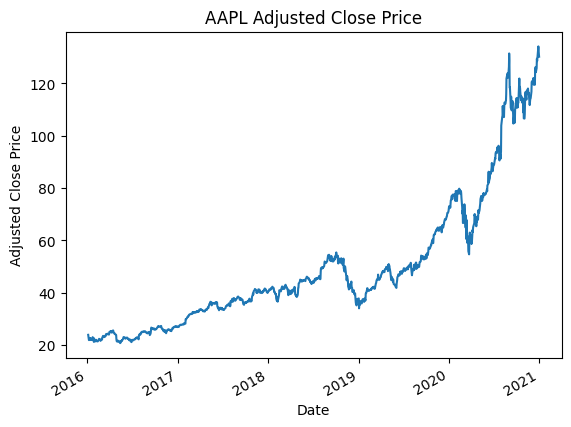

In [6]:
import matplotlib.pyplot as plt

# Plot the adjusted close price
data['Adj Close'].plot()
plt.ylabel("Adjusted Close Price")
plt.title("AAPL Adjusted Close Price")
plt.show()

[*********************100%%**********************]  1 of 1 completed


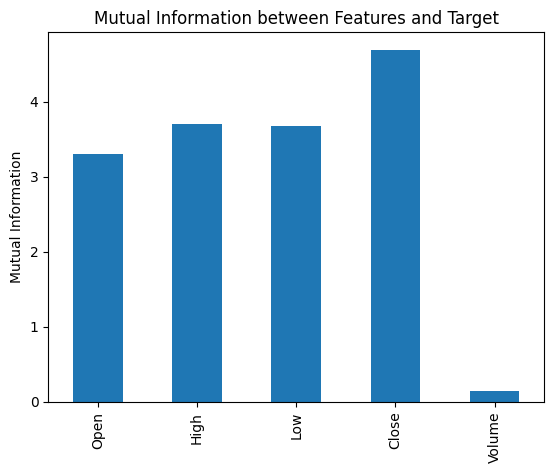

In [7]:
# Plot Mutual Information
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# Get the data for the stock Apple by specifying the stock ticker, start date, and end date
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Adj Close'
data = yf.download('AAPL','2016-01-01','2021-01-01')[features + [target]]
data = data.dropna()

# Calculate the mutual information between the features and the target
mi = pd.Series(mutual_info_regression(data[features], data[target], discrete_features=False), index=features)

# Plot the mutual information
mi.plot(kind='bar')
plt.ylabel("Mutual Information")
plt.title("Mutual Information between Features and Target")
plt.show()

Mean Absolute Error: 0.38


/var/folders/t8/mbfp_kbs6f311pnlwm3fg2280000gn/T/ipykernel_37355/542798719.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Adj Close Predicted'] = model.predict(X_test)


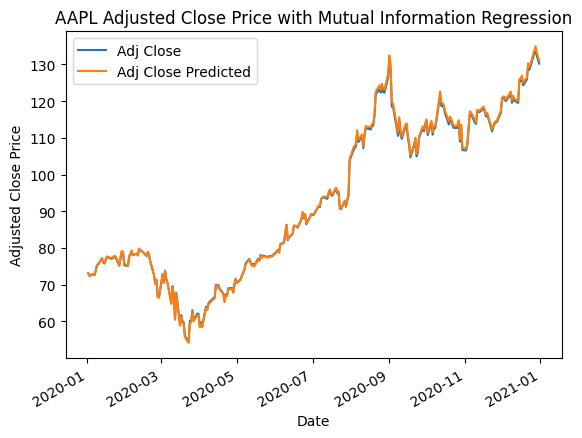

In [10]:
# Plot MI Regression
from sklearn.feature_selection import SelectKBest, f_regression

# use the `data` DataFrame from the previous cell
data_train = data.loc['2016-01-01':'2019-12-31']
data_test = data.loc['2020-01-01':]

# Select the top 2 features based on mutual information
selector = SelectKBest(mutual_info_regression, k=2)
X_train = selector.fit_transform(data_train[features], data_train[target])
X_test = selector.transform(data_test[features])

# Fit a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, data_train[target])

# Calculate the mean absolute error of the model
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(data_test[target], model.predict(X_test))
print(f"Mean Absolute Error: {mae:.2f}")

# Plot the actual vs. predicted values
data_test['Adj Close Predicted'] = model.predict(X_test)
data_test[[target, 'Adj Close Predicted']].plot()
plt.ylabel("Adjusted Close Price")
plt.title("AAPL Adjusted Close Price with Mutual Information Regression")
plt.show()

Average Player Score: 0.49
Average Opponent Score: 0.51


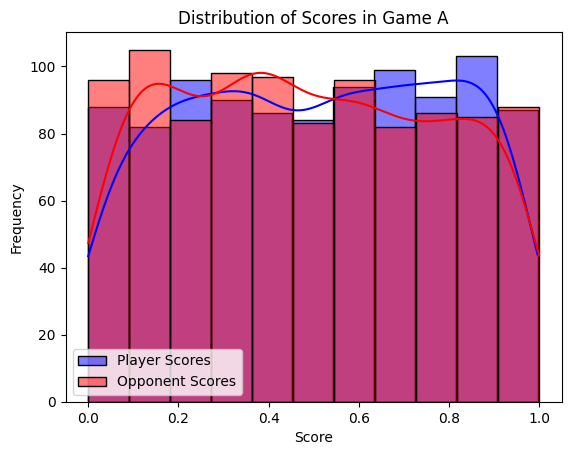

In [12]:
# Create a Monte Carlo Simulation
import random

# Define the game rules

def game_a():
    deck = list(range(52))
    random.shuffle(deck)
    player_hand = []
    opponent_hand = []
    for _ in range(15):
        card = deck.pop()
        if len(player_hand) < 5:
            player_hand.append(card)
        else:
            opponent_hand.append(card)
    player_score = evaluate_hand(player_hand)
    opponent_score = evaluate_hand(opponent_hand)
    return player_score, opponent_score

def evaluate_hand(hand):
    # Evaluate the hand based on poker rules
    return random.random()

# Run the Monte Carlo simulation
num_simulations = 1000
player_scores = []
opponent_scores = []
for _ in range(num_simulations):
    player_score, opponent_score = game_a()
    player_scores.append(player_score)
    opponent_scores.append(opponent_score)

# Calculate the average scores
avg_player_score = sum(player_scores) / num_simulations
avg_opponent_score = sum(opponent_scores) / num_simulations
print(f"Average Player Score: {avg_player_score:.2f}")
print(f"Average Opponent Score: {avg_opponent_score:.2f}")

# Plot the distribution of scores
sns.histplot(
    opponent_scores
             , kde=True, color='blue', label='Player Scores')
sns.histplot(
    player_scores
             , kde=True, color='red', label='Opponent Scores')
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Scores in Game A")
plt.legend()
plt.show()

Average Result: 23.67


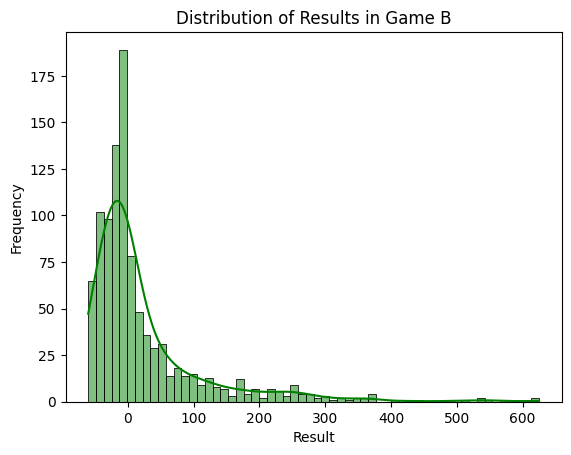

In [13]:
# Game B Monte Carlo Simulation
def game_b(n):
    numbers = list(range(1, n+1))
    random.shuffle(numbers)
    guess = 0
    for i, num in enumerate(numbers):
        if num == i+1:
            guess += num**2 - 3
        else:
            guess -= 3
    return guess

# Run the Monte Carlo simulation
num_simulations = 1000
results = []
for _ in range(num_simulations):
    n = random.randint(2, 20)
    result = game_b(n)
    results.append(result)

# Calculate the average result
avg_result = sum(results) / num_simulations
print(f"Average Result: {avg_result:.2f}")

# Plot the distribution of results
sns.histplot(results, kde=True, color='green')
plt.xlabel("Result")
plt.ylabel("Frequency")
plt.title("Distribution of Results in Game B")
plt.show()